# Model Comparison Visualization

This notebook visualizes the performance metrics of different models for vulnerability detection.

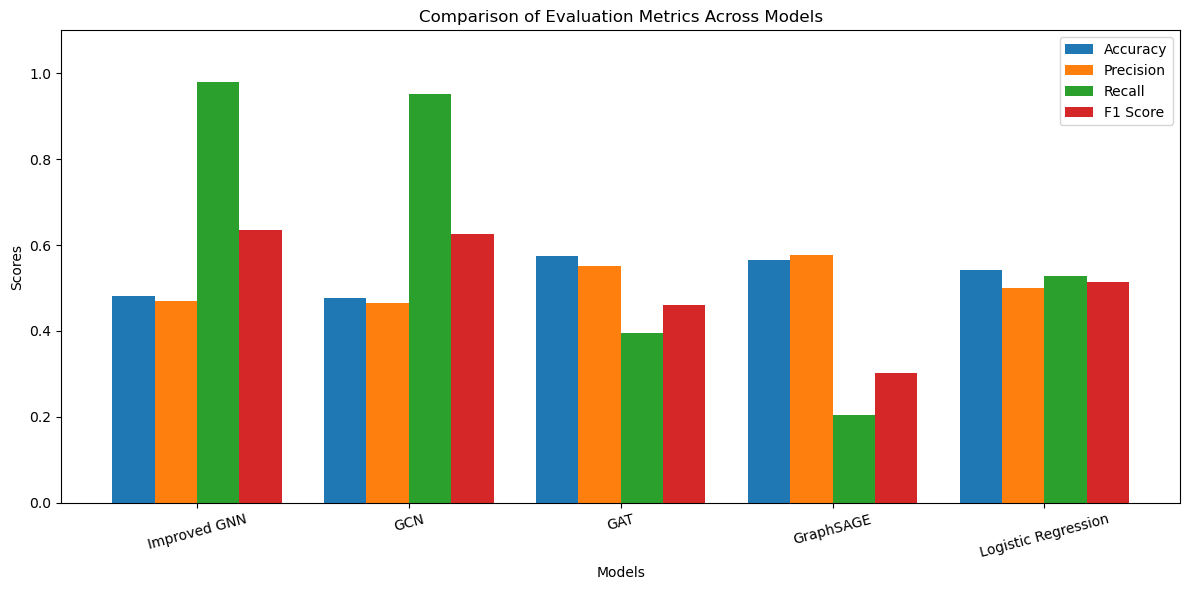

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["Improved GNN", "GCN", "GAT", "GraphSAGE", "Logistic Regression"]

# Corresponding metrics
accuracy = [0.4815, 0.4766, 0.5746, 0.5661, 0.5417]
precision = [0.4688, 0.4655, 0.5507, 0.5761, 0.5000]
recall = [0.9805, 0.9521, 0.3945, 0.2048, 0.5271]
f1_score = [0.6344, 0.6253, 0.4597, 0.3022, 0.5132]

# Set position of bar on X axis
x = np.arange(len(models))
width = 0.2

# Create subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars
ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
ax.bar(x - 0.5*width, precision, width, label='Precision')
ax.bar(x + 0.5*width, recall, width, label='Recall')
ax.bar(x + 1.5*width, f1_score, width, label='F1 Score')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Evaluation Metrics Across Models')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.set_ylim(0, 1.1)
ax.legend()

# Display plot
plt.tight_layout()
plt.show()

## Analysis of Results

Based on the visualization, we can observe:

1. **F1 Score**: Improved GNN and GCN have the highest F1 scores (0.63 and 0.62), making them the most balanced models overall.

2. **Recall**: Improved GNN and GCN have very high recall (0.98 and 0.95), indicating they catch almost all vulnerabilities, but at the cost of lower precision.

3. **Precision**: GraphSAGE has the highest precision (0.58), followed by GAT (0.55), meaning they have fewer false positives.

4. **Accuracy**: GAT has the highest accuracy (0.57), followed by GraphSAGE (0.57).

5. **Trade-offs**: There's a clear trade-off between precision and recall across the models. The GNN-based models that prioritize recall (Improved GNN, GCN) have lower precision, while those with higher precision (GraphSAGE, GAT) have lower recall.

The choice of model depends on the specific requirements of the vulnerability detection task:
- If missing vulnerabilities is very costly (high risk), prefer Improved GNN or GCN for their high recall.
- If false positives are costly (e.g., limited resources for manual review), prefer GraphSAGE or GAT for their higher precision.

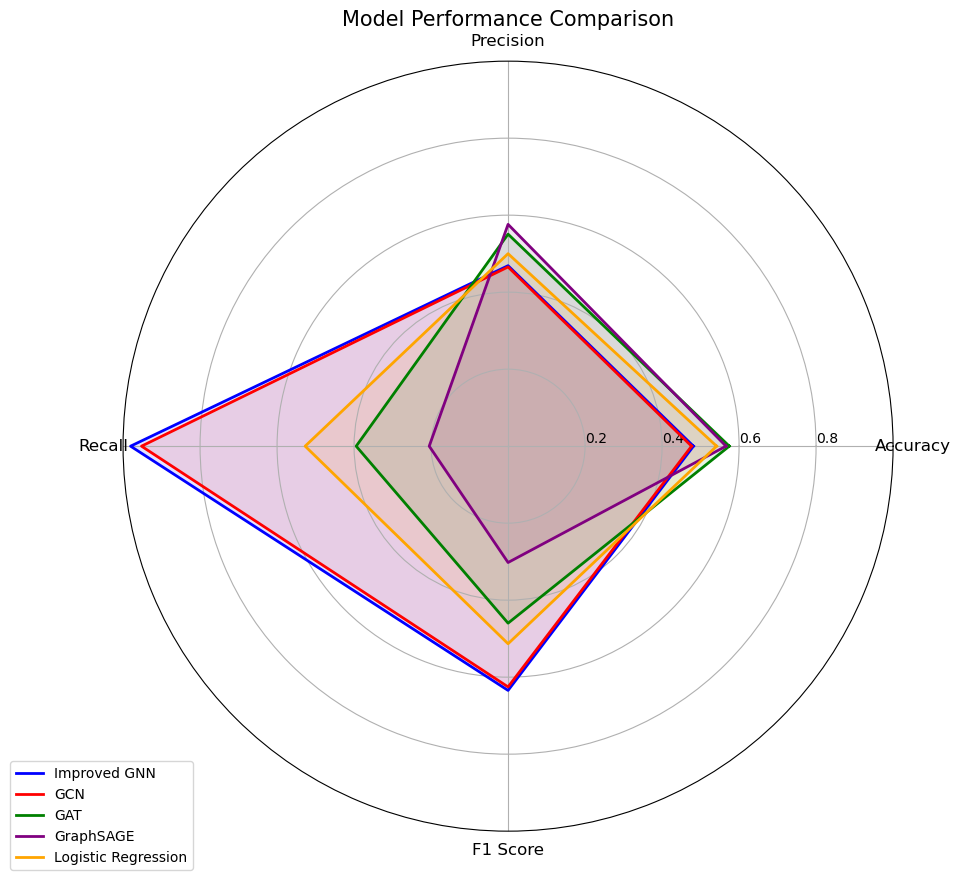

In [ ]:
# Additional visualization: Radar chart for comparing models
import matplotlib.pyplot as plt
import numpy as np

# Function to create a radar chart
def radar_chart(metrics_names, metrics_values, model_names):
    # Number of variables
    N = len(metrics_names)

    # Angle of each axis
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop

    # Create figure
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    # Draw one axis per variable and add labels
    plt.xticks(angles[:-1], metrics_names, size=12)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], size=10)
    plt.ylim(0, 1)

    # Plot each model
    colors = ['blue', 'red', 'green', 'purple', 'orange']
    for i, model in enumerate(model_names):
        values = [metrics_values[j][i] for j in range(len(metrics_values))]
        values += values[:1]  # Close the loop

        # Plot values
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=model, color=colors[i])
        ax.fill(angles, values, alpha=0.1, color=colors[i])

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title('Model Performance Comparison', size=15)

    return fig, ax

# Use the function
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_values = [accuracy, precision, recall, f1_score]

fig, ax = radar_chart(metrics_names, metrics_values, models)
plt.show()